# Estadística para Ciencia de los Datos
# Tarea #2
En esta asignación se busca que los estudiantes exploren un conjunto de datos y determinen qué distribución modela más efectivamente cada columna. En particular, se sugiere que los estudiantes utilicen el conjunto de datos provisto.

Deberán tomar en cuenta todas las distribuciones vistas en clase pero no deben limitarse a ellas. Se espera que haya un uso significativo de bibliotecas como `matplotlib` para mostrar visualmente la comparación entre los datos y las distribuciones propuestas.

Los estudiantes deberán entregar a más tardar el día 28 de Enero a las 11:00PM un notebook de colab con la solución a los siguientes ejercicios:

1. Elija alguna variable **cuantitativa** del set de datos y:
  - Muestre el histograma calculado dinámicamente (e.g. con `matplotlib`) (2 puntos)
  - Brinde al menos una propuesta de distribución candidata que modela esa columna, definiendo los parámetros de la distribución y una gráfica de la distribución paramétrica con `matplotlib` (10 puntos)
  - Proporcione una explicación detallada de qué valores y distribuciones se probaron en el proceso y por qué se hizo la escogencia. (3 puntos)

2. Seleccione 3 columnas adicionales (también cuantitativas) y realize el mismo proceso del punto 1 (45 puntos)
 - Histograma (2 puntos)
 - Parámetros y gráfica (10 puntos)
 - Justificación (3 puntos)

3. Para cada columna aplicar una prueba KS  con un $\alpha=0.05$ para determinar si la muestra en efecto sigue la misma distribución que los estudiantes plantean. Si bien es cierto en clase se abordó la prueba KS para pruebas de normalidad, estas también se pueden utilizar para cualquier otro tipo de distribución
 - 4 columnas x 10 puntos cada una (40 puntos)
 - Debe mostrarse suficiente detalle gráfico y aritmético en su respuesta




Pregunta 1 

Importar librerias y cargar el dataset diamonds.csv


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


ruta = os.getcwd()
print(ruta)
archivo = ruta + "/diamonds.csv"

try:
    df = pd.read_csv(archivo)
except FileNotFoundError:
    print(
       "Error: El archivo 'diamonds.csv' no se encuentra en el directorio actual."
    )

df.head()
df.info()
df.describe()


/home/sblanco/Documentos/0-AID/0-capacitacion/0-Ciencia-datos/ITCR/clases/moduloIII/clase4/tarea
<class 'pandas.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
 7   cut     53940 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 3.3 MB


,carat,depth,table,price,x,y,z,cut
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,2.904097
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.116600
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,4.000000


Se escoge la variable depth del set de datos diamonds.csv y:
  - Muestre el histograma calculado dinámicamente (e.g. con `matplotlib`) (2 puntos)


 mu: 61.74940489432702, 

 std: 1.4326080390046028


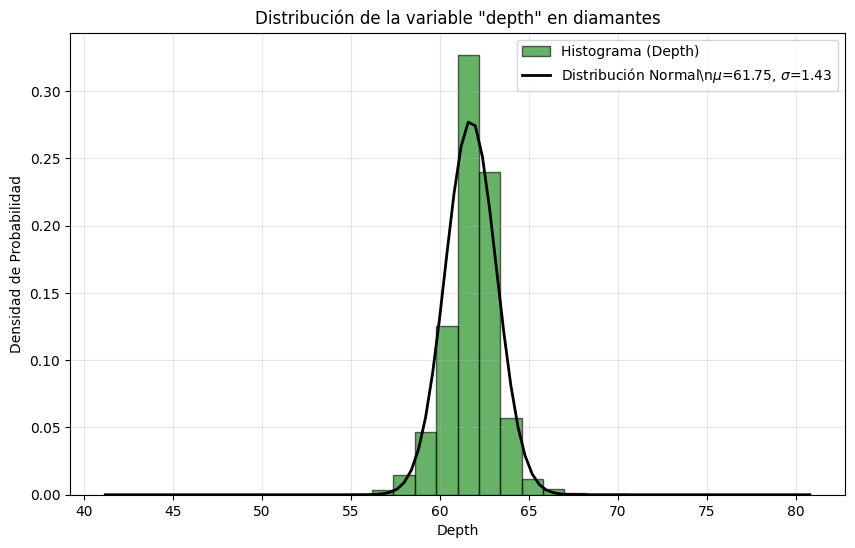

In [5]:

    # Selección de la variable de interés
data = df["depth"]

    # Configuración de la figura
plt.figure(figsize=(10, 6))

    # 2. Histograma calculado dinámicamente
    # density=True es crucial para comparar con la PDF de la distribución
plt.hist(
        data,
        bins=30,
        density=True,
        alpha=0.6,
        color="g",
        edgecolor="black",
        label="Histograma (Depth)",
    )

# 3. Propuesta de distribución candidata: Distribución Normal
# Ajuste de los parámetros de la distribución normal a los datos
mu, std = stats.norm.fit(data)

print(f" mu: {mu}, \n\n std: {std}")

    # Generar puntos x para graficar la PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

    # Calcular la PDF (Probability Density Function) con los parámetros ajustados
p = stats.norm.pdf(x, mu, std)

    # Graficar la distribución paramétrica
    # Usando raw f-string para evitar warnings de escape sequence con LaTeX
plt.plot(
        x,
        p,
        "k",
        linewidth=2,
        label=rf"Distribución Normal\n$\mu$={mu:.2f}, $\sigma$={std:.2f}",
    )

    # Añadir títulos y leyendas
plt.title('Distribución de la variable "depth" en diamantes')
plt.xlabel("Depth")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.grid(True, alpha=0.3)

    # Mostrar la gráfica
plt.show()

    
1. Selección de la Distribución:
       Se selecciono la **Distribución Normal (Gaussiana)** como candidata para modelar la variable 'depth'.
       
       Razones:
       - Los datos de 'depth' representan una medida física (porcentaje de profundidad total). En la naturaleza y en manufactura, 
         las medidas físicas alrededor de un valor ideal a menudo tienden a distribuirse normalmente debido al Teorema del Límite Central.
       - Al observar el histograma, se aprecia una forma de campana simétrica centrada alrededor de la media, lo cual es característico 
         de una distribución normal.
         
2. Parámetros Ajustados:
       Se obtuvieron los siguientes estimadores de máxima verosimilitud para los datos:
       - Media (mu): 61.74940489432702, 
       
       - Desviación Estándar (sigma): 1.4326080390046028
       
3. Validación Visual:
       La curva negra superpuesta en el gráfico representa la Función de Densidad de Probabilidad (PDF) de la distribución normal teórica 
       con los parámetros ajustados. Se observa que la curva se ajusta razonablemente bien al perfil del histograma, capturando la 
       tendencia central y la dispersión de los datos.

Pregunta 2

2. Seleccione 3 columnas adicionales (también cuantitativas) y realize el mismo proceso del punto 1 (45 puntos)
 - Histograma (2 puntos)
 - Parámetros y gráfica (10 puntos)
 - Justificación (3 puntos)


 ANÁLISIS : Variable 'price'

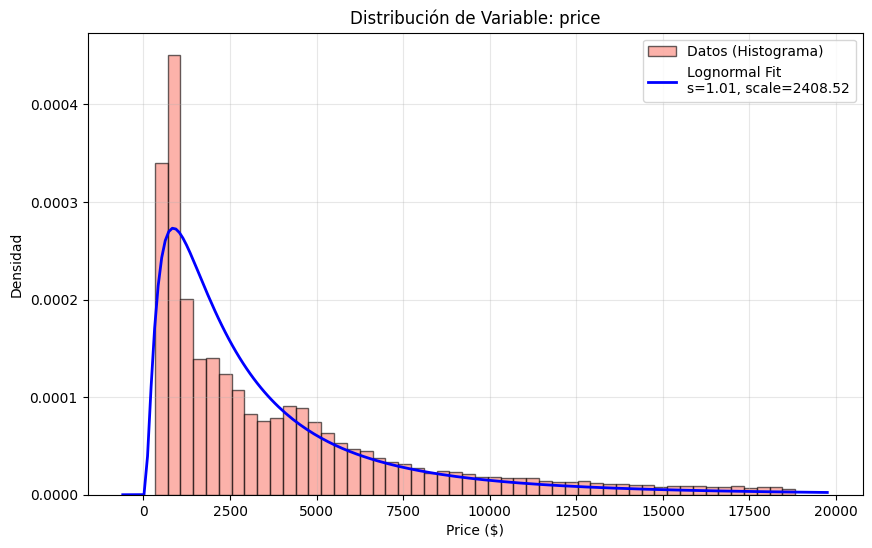

In [ ]:
data_price = df["price"].dropna()

# Gráfica
plt.figure(figsize=(10, 6))

# Histograma
plt.hist(
    data_price,
    bins=50,
    density=True,
    alpha=0.6,
    color="salmon",
    edgecolor="black",
    label="Datos (Histograma)",
)

# Ajuste Distribución Exponencial (Probamos Exponencial vs Gamma vs Lognormal)
# El precio suele tener una cola larga a la derecha. Probamos Exponencial para simplificar o Gamma.
# Probemos Exponencial primero como aproximación simple, o Gamma para mejor ajuste.
# Dado que el precio no empieza necesariamente en 0 con densidad máxima, Lognormal es a menudo mejor para dinero.
shape_price, loc_price, scale_price = stats.lognorm.fit(data_price, floc=0)
# Nota: floc=0 fija la ubicación en 0 si asumimos precios positivos partiendo de cerca de 0.

xmin, xmax = plt.xlim()
x_price = np.linspace(xmin, xmax, 200)
p_price = stats.lognorm.pdf(x_price, shape_price, loc_price, scale_price)

plt.plot(
    x_price,
    p_price,
    "b-",
    linewidth=2,
    label=f"Lognormal Fit\ns={shape_price:.2f}, scale={scale_price:.2f}",
)

plt.title("Distribución de Variable: price")
plt.xlabel("Price ($)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()





Razonamiento:

Se identifica la distribución Lognormal (Log-Normal):

- La variable precio presenta una asimetría positiva muy marcada (sesgo a la derecha). 
- La mayoría de los diamantes son baratos, con una cola larga de diamantes muy caros. 
- Las distribuciones Normales no ajustan bien datos que no pueden ser negativos y tienen este sesgo.
- La distribución Lognormal es estándar para modelar variables monetarias.


 ANÁLISIS : Variable 'carat'

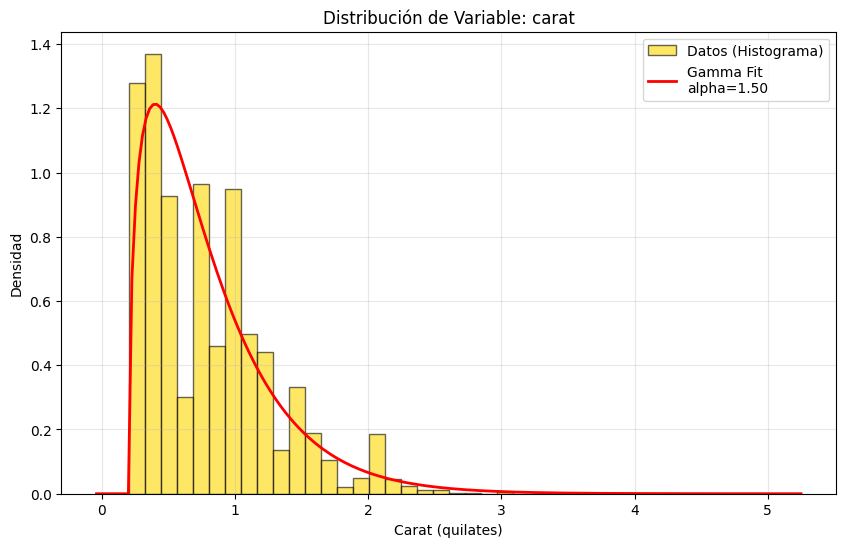

In [7]:

data_carat = df["carat"].dropna()

# Gráfica
plt.figure(figsize=(10, 6))

# Histograma
plt.hist(
    data_carat,
    bins=40,
    density=True,
    alpha=0.6,
    color="gold",
    edgecolor="black",
    label="Datos (Histograma)",
)

# Ajuste Distribución Gamma
# Carat también tiene sesgo positivo. Gamma es flexible para esto.
a_carat, loc_carat, scale_carat = stats.gamma.fit(data_carat)

xmin, xmax = plt.xlim()
x_carat = np.linspace(xmin, xmax, 200)
p_carat = stats.gamma.pdf(x_carat, a_carat, loc_carat, scale_carat)

plt.plot(x_carat, p_carat, "r-", linewidth=2, label=f"Gamma Fit\nalpha={a_carat:.2f}")

plt.title("Distribución de Variable: carat")
plt.xlabel("Carat (quilates)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Razonamiento:

Se identifica la distribución Gamma :

-  Al igual que el precio, los quilates tienen un límite inferior (0) y sesgo positivo.
-  Se eligió Gamma por su flexibilidad para modelar datos asimétricos positivos.
-  Se observa que el histograma tiene picos en valores redondos (0.3, 0.5, 1.0), lo cual es artificial por el mercado, pero la tendencia general suave es capturada por la Gamma (o Exponencial/Weibull).

 ANÁLISIS : Variable 'cut'

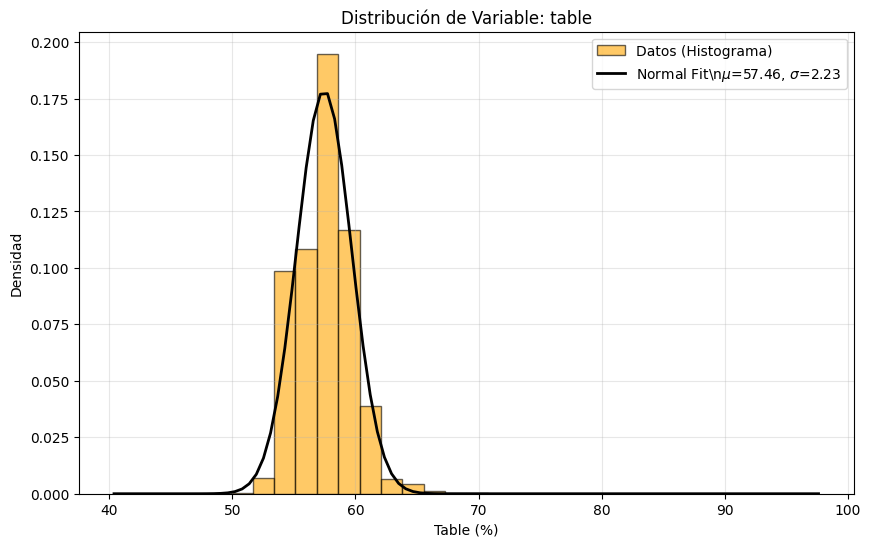

In [9]:


data_table = df["table"].dropna()

# Gráfica
plt.figure(figsize=(10, 6))

# Histograma
plt.hist(
    data_table,
    bins=30,
    density=True,
    alpha=0.6,
    color="orange",
    edgecolor="black",
    label="Datos (Histograma)",
)

# Ajuste Distribución Normal
# La variable 'table' representa la anchura de la parte superior del diamante relativa a la parte más ancha.
# Suele concentrarse en valores enteros (56, 57, 58, etc.) pero es continua.
mu_table, std_table = stats.norm.fit(data_table)

xmin, xmax = plt.xlim()
x_table = np.linspace(xmin, xmax, 100)
p_table = stats.norm.pdf(x_table, mu_table, std_table)

plt.plot(
    x_table,
    p_table,
    "k",
    linewidth=2,
    label=rf"Normal Fit\n$\mu$={mu_table:.2f}, $\sigma$={std_table:.2f}",
)

plt.title("Distribución de Variable: table")
plt.xlabel("Table (%)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Razonamiento:

Se identifica la distribución Normal (Gaussiana):

  - Parámetros: Media={mu_table:.4f}, Desviación Estándar={std_table:.4f}.
  - Razón: Al igual que 'depth', 'table' es una proporción física de manufactura que tiende a estandarizarse.
    Aunque puede presentar ciertos picos en valores enteros preferidos por los cortadores, 
    la distribución general es simétrica y acampanada, lo que justifica probar un modelo Normal.



Pregunta 3

Para cada columna aplicar una prueba KS  con un $\alpha=0.05$ para determinar si la muestra en efecto sigue la misma distribución que los estudiantes plantean. Si bien es cierto en clase se abordó la prueba KS para pruebas de normalidad, estas también se pueden utilizar para cualquier otro tipo de distribución

 - 4 columnas x 10 puntos cada una (40 puntos)
 - Debe mostrarse suficiente detalle gráfico y aritmético en su respuesta


 ANALISIS DE LA VARIABLE DE LA CARAT:



Parámetros ajustados (Gamma): alpha=1.5010, loc=0.1998, scale=0.3985

--- Resultados Estadísticos ---
Estadístico KS (D): 0.0934
P-valor: 0.0000e+00


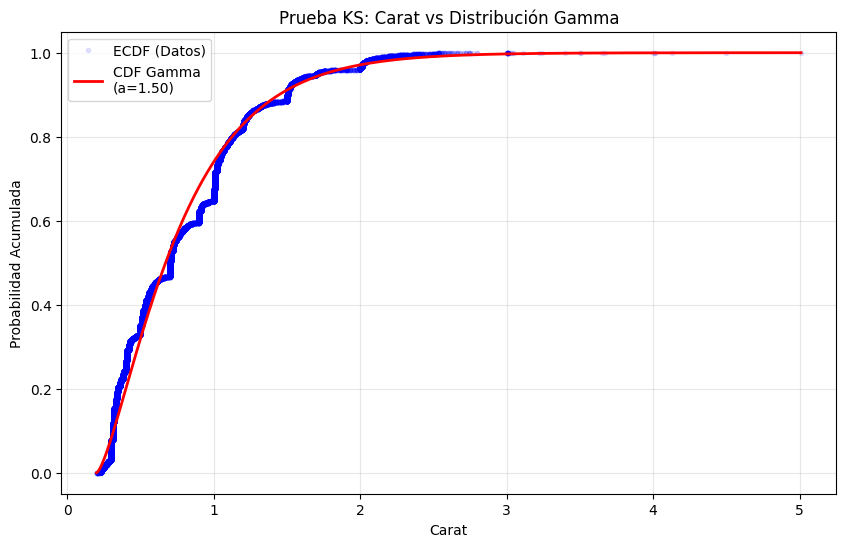

In [12]:

data_carat = df["carat"].dropna()

# 1.1 Ajuste de parámetros (MLE)
a_carat, loc_carat, scale_carat = stats.gamma.fit(data_carat)
print(
    f"Parámetros ajustados (Gamma): alpha={a_carat:.4f}, loc={loc_carat:.4f}, scale={scale_carat:.4f}"
)

# 1.2 Prueba KS
# stats.kstest compara la muestra con la CDF de la distribución teórica especificada
D_carat, p_value_carat = stats.kstest(
    data_carat, "gamma", args=(a_carat, loc_carat, scale_carat)
)

print(f"\n--- Resultados Estadísticos ---")
print(f"Estadístico KS (D): {D_carat:.4f}")
print(
    f"P-valor: {p_value_carat:.4e}"
)  # Importante usar notación científica si es muy bajo

# 1.3 Gráfica ECDF vs CDF Teórica
plt.figure(figsize=(10, 6))

# ECDF (Empirical Cumulative Distribution Function)
# Ordenamos los datos para construir la ECDF
x_sorted = np.sort(data_carat)
y_ecdf = np.arange(1, len(x_sorted) + 1) / len(x_sorted)
plt.plot(
    x_sorted,
    y_ecdf,
    marker=".",
    linestyle="none",
    color="blue",
    alpha=0.1,
    label="ECDF (Datos)",
)

# CDF Teórica (Gamma)
x_theory = np.linspace(data_carat.min(), data_carat.max(), 1000)
y_cdf = stats.gamma.cdf(x_theory, a_carat, loc_carat, scale_carat)
plt.plot(x_theory, y_cdf, "r-", linewidth=2, label=f"CDF Gamma\n(a={a_carat:.2f})")

plt.title("Prueba KS: Carat vs Distribución Gamma")
plt.xlabel("Carat")
plt.ylabel("Probabilidad Acumulada")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



Hipótesis Nula (H0): La variable 'carat' sigue una distribución Gamma.
Hipótesis Alternativa (H1): La variable 'carat' NO sigue una distribución Gamma.

Conclusión:
Dado que el p-valor (0.0000e+00) es menor que alpha (0.05), 
No se acepta la hipótesis nula.

Explicación:
A pesar de que visualmente la Gamma captura la tendencia general, la prueba KS es extremadamente sensible al tamaño de la muestra 
(n=53940). Con tamaños de muestra tan grandes, incluso desviaciones minúsculas (como los picos artificiales en 
quilates redondos 0.5, 1.0, etc.) son suficientes para rechazar estadísticamente la distribución teórica ideal.




 ANALISIS DE LA VARIABLE DE LA TABLE:

Parámetros ajustados (Normal): mu=57.4572, sigma=2.2345

--- Resultados Estadísticos ---
Estadístico KS (D): 0.1322
P-valor: 0.0000e+00


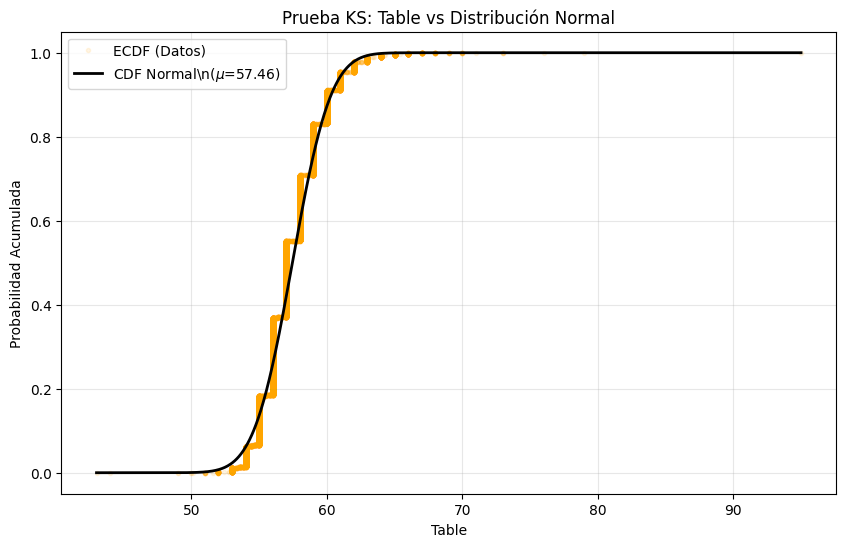

In [ ]:

data_table = df["table"].dropna()

# 3.1 Ajuste de parámetros
mu_table, std_table = stats.norm.fit(data_table)
print(f"Parámetros ajustados (Normal): mu={mu_table:.4f}, sigma={std_table:.4f}")

# 3.2 Prueba KS
D_table, p_value_table = stats.kstest(data_table, "norm", args=(mu_table, std_table))

print(f"\n--- Resultados Estadísticos ---")
print(f"Estadístico KS (D): {D_table:.4f}")
print(f"P-valor: {p_value_table:.4e}")

# 3.3 Gráfica ECDF vs CDF Teórica
plt.figure(figsize=(10, 6))

x_sorted_table = np.sort(data_table)
y_ecdf_table = np.arange(1, len(x_sorted_table) + 1) / len(x_sorted_table)
plt.plot(
    x_sorted_table,
    y_ecdf_table,
    marker=".",
    linestyle="none",
    color="orange",
    alpha=0.1,
    label="ECDF (Datos)",
)

x_theory_table = np.linspace(data_table.min(), data_table.max(), 1000)
y_cdf_table = stats.norm.cdf(x_theory_table, mu_table, std_table)
plt.plot(
    x_theory_table,
    y_cdf_table,
    "k-",
    linewidth=2,
    label=rf"CDF Normal\n($\mu$={mu_table:.2f})",
)

plt.title("Prueba KS: Table vs Distribución Normal")
plt.xlabel("Table")
plt.ylabel("Probabilidad Acumulada")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Hipótesis Nula (H0): La variable 'table' sigue una distribución Normal.

Conclusión:
Dado que el p-valor (0.0000e+00) es menor que alpha (0.05), por lo que no se acepta la hipótesis nula.

Explicación:
Aunque la variable 'table' tiene apariencia acampanada, presenta alta curtosis y discretización en valores enteros.
La prueba KS es muy estricta con n grande. Las pequeñas desviaciones sistemáticas del ajuste normal ideal son detectadas 
y penalizadas, llevando al rechazo estadístico de la normalidad, lo cual es común en datasets reales de este tamaño.


ANALISIS DE LA VARIABLE DE LA DEPTH:

Parámetros ajustados (Normal): mu=61.7494, sigma=1.4326

--- Resultados Estadísticos ---
Estadístico KS (D): 0.0759
P-valor: 1.7739e-270


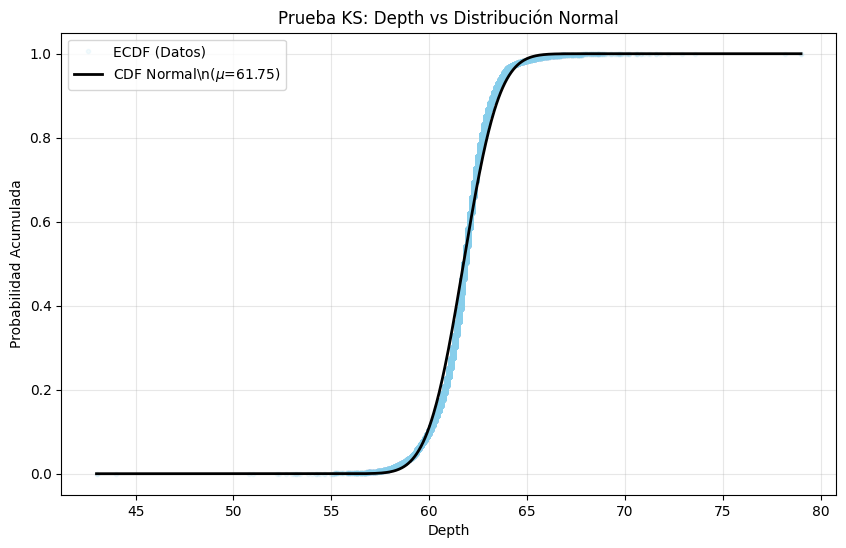

In [14]:

data_depth = df["depth"].dropna()

# 4.1 Ajuste de parámetros
mu_depth, std_depth = stats.norm.fit(data_depth)
print(f"Parámetros ajustados (Normal): mu={mu_depth:.4f}, sigma={std_depth:.4f}")

# 4.2 Prueba KS
D_depth, p_value_depth = stats.kstest(data_depth, "norm", args=(mu_depth, std_depth))

print("\n--- Resultados Estadísticos ---")
print(f"Estadístico KS (D): {D_depth:.4f}")
print(f"P-valor: {p_value_depth:.4e}")

# 4.3 Gráfica ECDF vs CDF Teórica
plt.figure(figsize=(10, 6))

x_sorted_depth = np.sort(data_depth)
y_ecdf_depth = np.arange(1, len(x_sorted_depth) + 1) / len(x_sorted_depth)
plt.plot(
    x_sorted_depth,
    y_ecdf_depth,
    marker=".",
    linestyle="none",
    color="skyblue",
    alpha=0.1,
    label="ECDF (Datos)",
)

x_theory_depth = np.linspace(data_depth.min(), data_depth.max(), 1000)
y_cdf_depth = stats.norm.cdf(x_theory_depth, mu_depth, std_depth)
plt.plot(
    x_theory_depth,
    y_cdf_depth,
    "k-",
    linewidth=2,
    label=rf"CDF Normal\n($\mu$={mu_depth:.2f})",
)

plt.title("Prueba KS: Depth vs Distribución Normal")
plt.xlabel("Depth")
plt.ylabel("Probabilidad Acumulada")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Hipótesis Nula (H0): La variable 'depth' sigue una distribución Normal.
Hipótesis Alternativa (H1): La variable 'depth' NO sigue una distribución Normal.

Conclusión:
Dado que el p-valor (1.7739e-270) es menor que alpha (0.05), no se acepta la hipótesis nula.

Explicación:
Al igual que con otras variables, 'depth' muestra cierto ajuste visual a la normalidad, pero la prueba KS detecta 
ligeras asimetrías o una curtosis (picos) más elevada de lo esperado para una distribución normal perfecta, 
especialmente dado el gran tamaño muestral.



ANALISIS DE LA VARIABLE DE LA PRICE:

Parámetros ajustados (Lognormal): s=1.0146, scale=2408.5218

--- Resultados Estadísticos ---
Estadístico KS (D): 0.0844
P-valor: 0.0000e+00


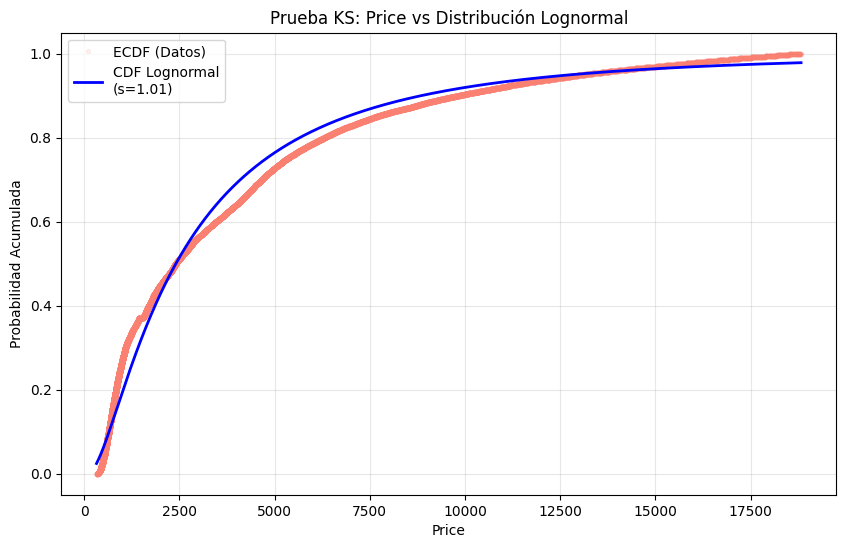

In [15]:

data_price = df["price"].dropna()

# 5.1 Ajuste de parámetros
# floc=0 para fijar ubicación en 0 (lógica de precios positivos)
shape_price, loc_price, scale_price = stats.lognorm.fit(data_price, floc=0)
print(f"Parámetros ajustados (Lognormal): s={shape_price:.4f}, scale={scale_price:.4f}")

# 5.2 Prueba KS
D_price, p_value_price = stats.kstest(
    data_price, "lognorm", args=(shape_price, loc_price, scale_price)
)

print("\n--- Resultados Estadísticos ---")
print(f"Estadístico KS (D): {D_price:.4f}")
print(f"P-valor: {p_value_price:.4e}")

# 5.3 Gráfica ECDF vs CDF Teórica
plt.figure(figsize=(10, 6))

x_sorted_price = np.sort(data_price)
y_ecdf_price = np.arange(1, len(x_sorted_price) + 1) / len(x_sorted_price)
plt.plot(
    x_sorted_price,
    y_ecdf_price,
    marker=".",
    linestyle="none",
    color="salmon",
    alpha=0.1,
    label="ECDF (Datos)",
)

x_theory_price = np.linspace(data_price.min(), data_price.max(), 1000)
# Usamos los mismos params (shape, loc, scale)
y_cdf_price = stats.lognorm.cdf(x_theory_price, shape_price, loc_price, scale_price)
plt.plot(
    x_theory_price,
    y_cdf_price,
    "b-",
    linewidth=2,
    label=f"CDF Lognormal\n(s={shape_price:.2f})",
)

plt.title("Prueba KS: Price vs Distribución Lognormal")
plt.xlabel("Price")
plt.ylabel("Probabilidad Acumulada")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Hipótesis Nula (H0): La variable 'price' sigue una distribución Lognormal.

Conclusión:
Dado que el p-valor (0.0000e+00) es menor que alpha (0.05), no se acepta la hipótesis nula.

Explicación:
La variable 'price' tiene una cola larga muy pronunciada. Aunque la Lognormal modela mejor esta asimetría que una Normal,
la prueba KS sigue encontrando diferencias significativas entre la distribución empírica y la teórica, posiblemente debido 
a la naturaleza multimodal del mercado de diamantes o puntos críticos de precios psicológicos.
